In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
import graphviz


In [2]:
dataset=pd.read_csv("titanic-passengers.csv", sep=";")
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


# Data Preprocessing 

In [3]:
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(dataset)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S


In [4]:
data=preprocess_data(dataset)

In [5]:
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=100)

In [7]:
classifier=tree.DecisionTreeClassifier()
classifier.fit(x_train,y_train)
predicted=classifier.predict(x_test)

In [8]:
print('score{}'.format(classifier.score(x_train,y_train)))
print('recall', metrics.recall_score(predicted,y_test))
print('accuracy:',metrics.accuracy_score(predicted,y_test))

score1.0
recall 0.6951219512195121
accuracy: 0.7653631284916201


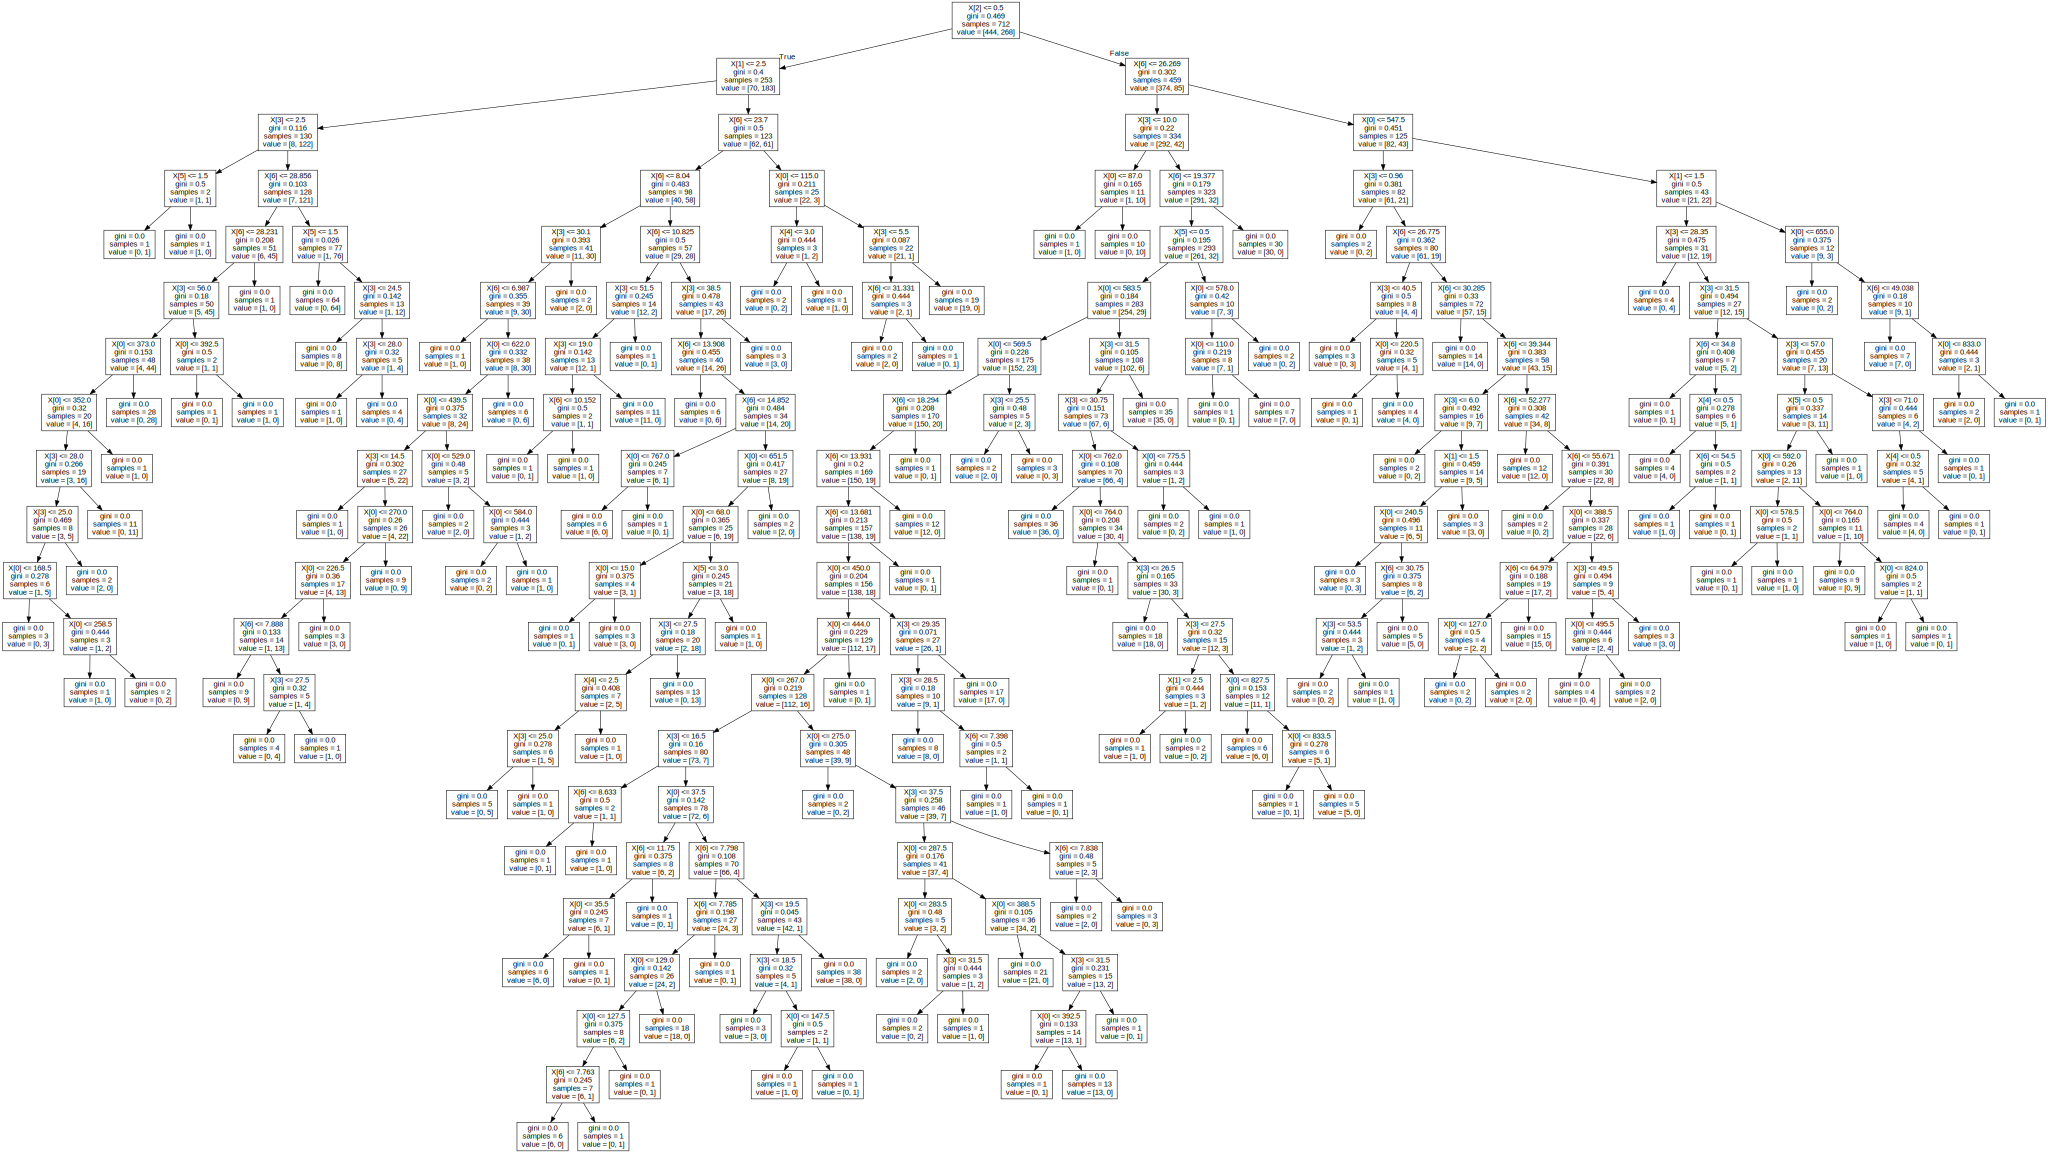

In [9]:
dot_data1=tree.export_graphviz(classifier,out_file=None)
graph1=graphviz.Source(dot_data1)
graph1.render("dataset")
graph1

In [10]:
clf=DecisionTreeClassifier(max_depth=3,min_samples_leaf=1,max_features=4)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [11]:
print('score{}'.format(clf.score(x_train,y_train)))
print('recall', metrics.recall_score(predicted,y_test))
print('accuracy:',metrics.accuracy_score(predicted,y_test))

score0.8300561797752809
recall 0.6951219512195121
accuracy: 0.7653631284916201


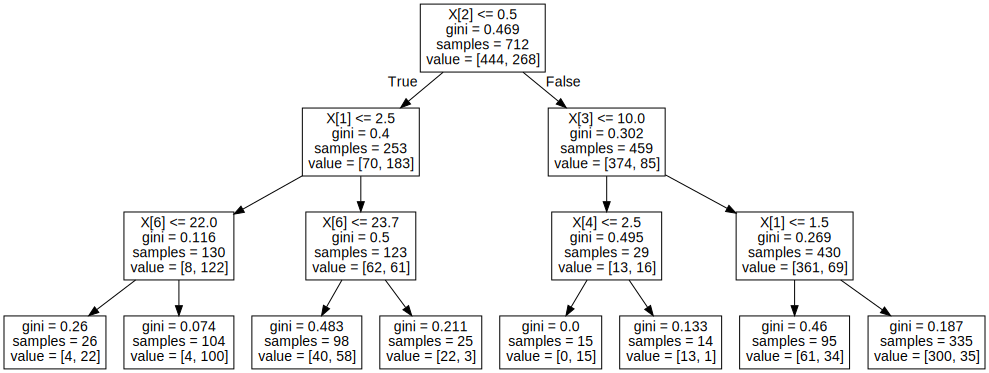

In [12]:
dot_data2=tree.export_graphviz(clf,out_file=None)
graph2=graphviz.Source(dot_data2)
graph2.render("data")
graph2

# Random Forest

In [13]:
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8268156424581006


In [14]:
clf=RandomForestClassifier(n_estimators=50) 
clf.fit(x_train, y_train)  
y_pred=clf.predict(x_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8324022346368715
